In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import cv2

# Explicit noise

## Functions

In [ ]:
def genMatrix(shape):
    """Generate a matrix of uniformly distributed random values."""
    return np.random.rand(*shape)

In [ ]:
def upscale(matrix, target_shape):
    """Upscale a matrix using linear interpolation."""
    scale_factor = np.array(target_shape) / np.array(matrix.shape)
    return cv2.resize(matrix, dsize=(target_shape[1], target_shape[0]), interpolation=cv2.INTER_NEAREST)

In [ ]:
def Convolve(matrix, sigma):
    """Apply Gaussian filter with given sigma."""
    return gaussian_filter(matrix, sigma=sigma)

In [ ]:
def plot_3d_surface(height_map):
    """Plot the height map as a 3D surface."""
    x = np.arange(0, height_map.shape[1])
    y = np.arange(0, height_map.shape[0])
    x, y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, height_map, cmap='terrain', linewidth=0, antialiased=True)
    ax.set_zlim(-0.5, 1.5)
    ax.view_init(elev=45, azim=60)
    plt.title("3D Surface Plot of Procedural Noise Map")
    plt.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()

In [ ]:
def plot_matrix(matrix, title="Matrix", cmap="viridis"):
    """Plot a single matrix as heatmap."""
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, cmap=cmap, cbar=True, square=True, xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.show()

In [ ]:
def plot_matrices(matrices, title_prefix, cmap="viridis"):
    """Plot multiple matrices side by side."""
    num_matrices = len(matrices)
    fig, axes = plt.subplots(1, num_matrices, figsize=(num_matrices * 5, 5))

    for i, matrix in enumerate(matrices):
        ax = axes[i]
        sns.heatmap(matrix, cmap=cmap, cbar=True, square=True, xticklabels=False, yticklabels=False, ax=ax)
        ax.set_title(f"{title_prefix} {i+1}")

    plt.tight_layout()
    plt.show()

## Method Execution

In [ ]:
# Parameters
base_sizes = [(4, 4), (16, 16), (64, 64)]  # Different scales for random matrices
final_size = (256, 256)                   # Final resolution
sigma_list = [2, 4, 8]                    # Smoothing scales

Step 1: Generating and upscaling matrices at different scales...


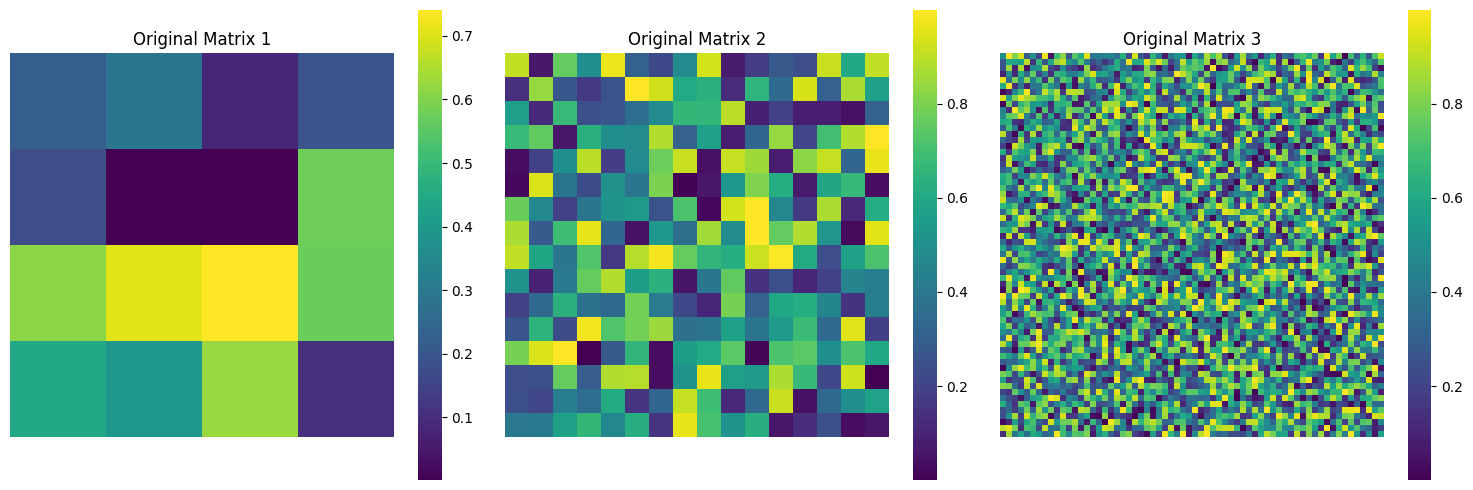

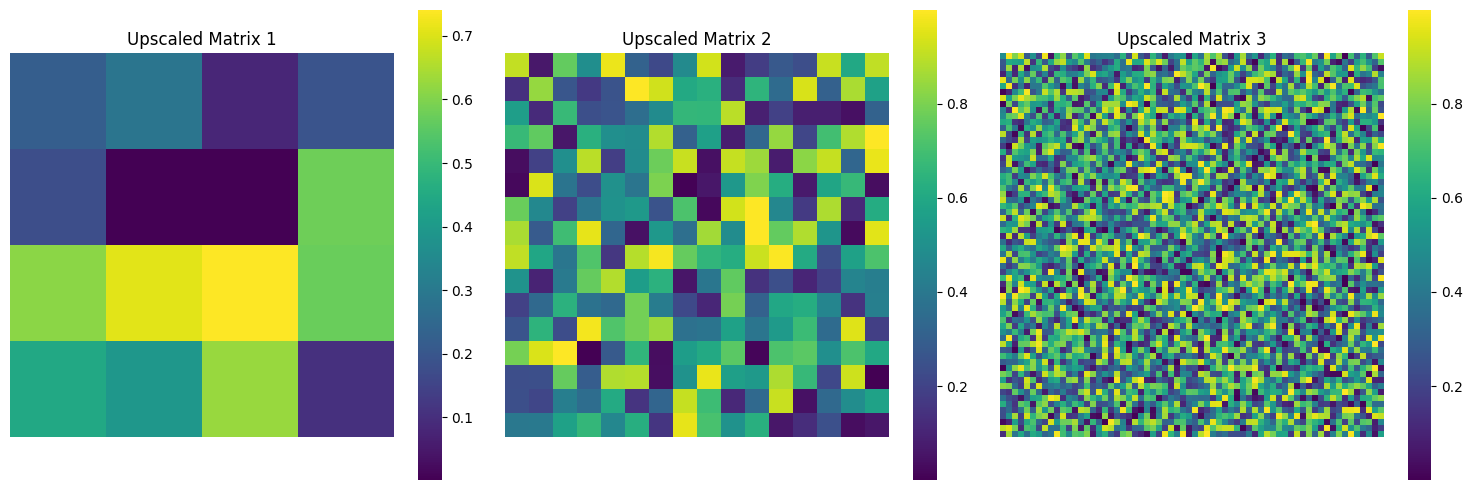

In [ ]:
# Step 1: Generate and upscale matrices at different scales
print("Step 1: Generating and upscaling matrices at different scales...")
matrices = [genMatrix(size) for size in base_sizes]
upscaled_matrices = [upscale(matrix, final_size) for matrix in matrices]

# Plot original matrices side by side
plot_matrices(matrices, "Original Matrix", cmap="viridis")

# Plot upscaled matrices side by side
plot_matrices(upscaled_matrices, "Upscaled Matrix", cmap="viridis")

Step 2: Averaging the upscaled matrices...


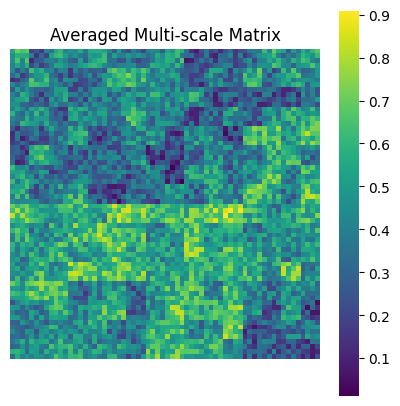

In [ ]:
# Step 2: Average the upscaled matrices
print("Step 2: Averaging the upscaled matrices...")
averaged_matrix = np.mean(upscaled_matrices, axis=0)
plot_matrix(averaged_matrix, "Averaged Multi-scale Matrix")

Step 3: Applying Gaussian smoothing...
Applying Gaussian blur (σ=2)


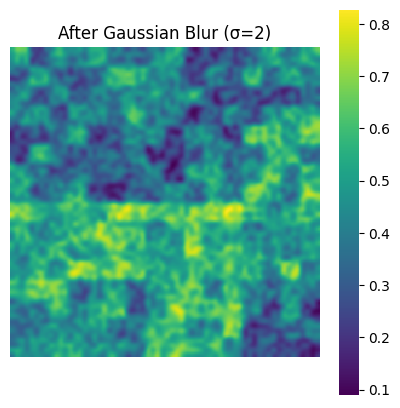

Applying Gaussian blur (σ=4)


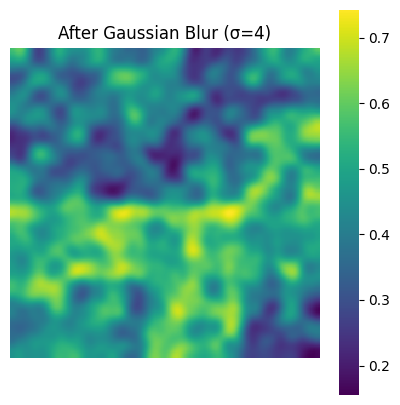

Applying Gaussian blur (σ=8)


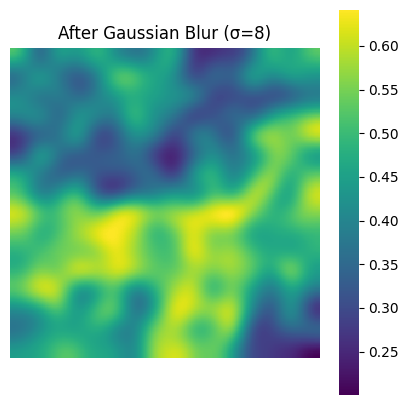

In [ ]:
# Step 3: Apply Gaussian smoothing
print("Step 3: Applying Gaussian smoothing...")
smoothed_matrix = averaged_matrix.copy()
for i, sigma in enumerate(sigma_list):
    print(f"Applying Gaussian blur (σ={sigma})")
    smoothed_matrix = Convolve(smoothed_matrix, sigma)
    plot_matrix(smoothed_matrix, f"After Gaussian Blur (σ={sigma})")

Final: Resulting Procedural Noise Map


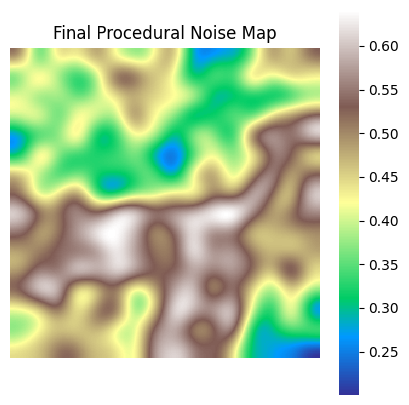

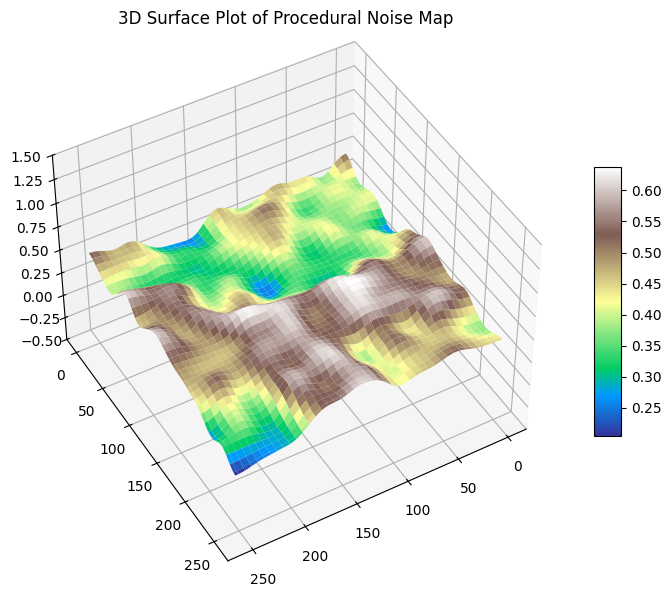

In [ ]:
# Final Result
print("Final: Resulting Procedural Noise Map")
plot_matrix(smoothed_matrix, "Final Procedural Noise Map", cmap="terrain")
plot_3d_surface(smoothed_matrix)